In [3]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [4]:
# Enable the cache
ff1.Cache.enable_cache('/Users/will/Library/Caches/fastf1') 

In [7]:
year = 2021
circuit = 'Russia'

ff1.Cache.enable_cache('/Users/will/Library/Caches/fastf1')
# Load the session data
race = ff1.get_session(year, circuit, 'R')
race.load()

core           INFO 	Loading data for Russian Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [9]:
driver_stints = race.laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(['Driver', 'Stint', 'Compound']
).count().reset_index()

In [11]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

In [12]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF'
}

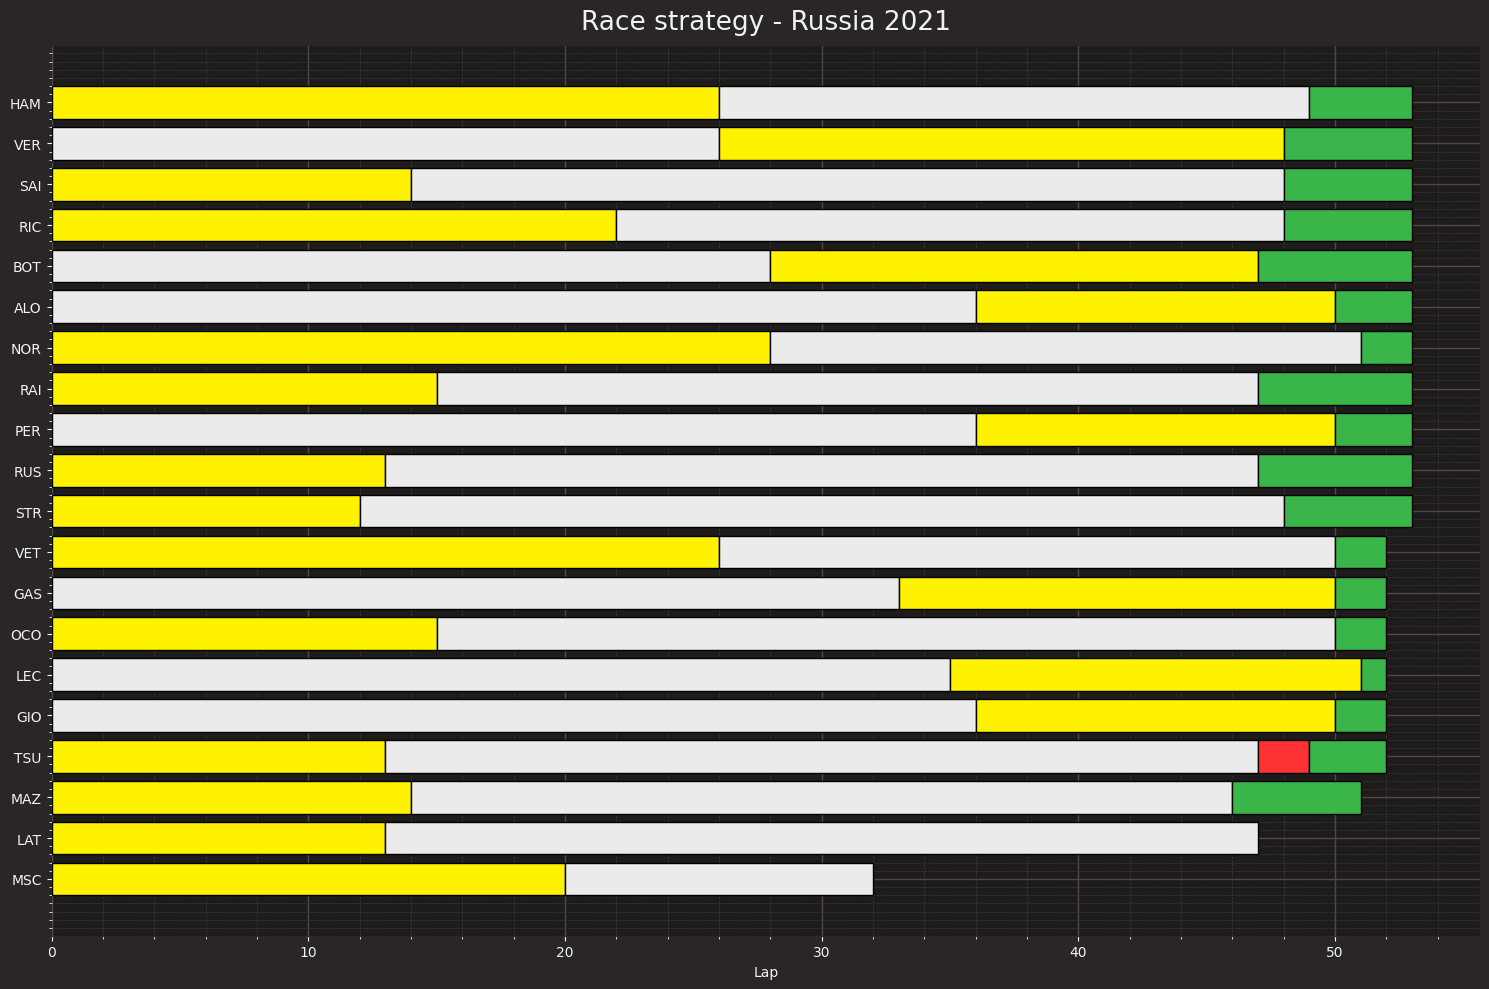

In [13]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
	
fig, ax = plt.subplots()
	
for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
        [driver], 
        stint['StintLength'], 
        left=previous_stint_end, 
        color=compound_colors[stint['Compound']], 
        edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']


plt.title(f'Race strategy - {circuit} {year}')
plt.xlabel('Lap')
plt.gca().invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
	
plt.savefig('strategy_russia.png', dpi=300)
	
plt.show()